# Work Status Classification (Private vs. Public vs. No Income)

In [1]:
# import packages
import sklearn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(16)

In [2]:
# load data
csv_file = "~/IDC5210_Machine_Learning/Project/Translated_data/demos_w_state_trans_sample10k.csv"
demo_df = pd.read_csv(csv_file)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10321 non-null  int64  
 1   Cust_ID                  10321 non-null  int64  
 2   Cust_Segment             10321 non-null  object 
 3   Branch_ID                10321 non-null  int64  
 4   Gender                   10321 non-null  object 
 5   Marital_Status           10321 non-null  object 
 6   Education_Lv             10321 non-null  object 
 7   Job_Status               10321 non-null  object 
 8   Income                   10080 non-null  float64
 9   Age                      10321 non-null  int64  
 10  Years_w_Bank             10321 non-null  float64
 11  Work_Region              10321 non-null  object 
 12  Home_Region              10321 non-null  object 
 13  Branch_Region            10321 non-null  object 
 14  1)RISKSIZ             

In [3]:
# drop unnecessary columns
demo_df.drop(["Unnamed: 0"], axis = 1, inplace=True)
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cust_ID                  10321 non-null  int64  
 1   Cust_Segment             10321 non-null  object 
 2   Branch_ID                10321 non-null  int64  
 3   Gender                   10321 non-null  object 
 4   Marital_Status           10321 non-null  object 
 5   Education_Lv             10321 non-null  object 
 6   Job_Status               10321 non-null  object 
 7   Income                   10080 non-null  float64
 8   Age                      10321 non-null  int64  
 9   Years_w_Bank             10321 non-null  float64
 10  Work_Region              10321 non-null  object 
 11  Home_Region              10321 non-null  object 
 12  Branch_Region            10321 non-null  object 
 13  1)RISKSIZ                10321 non-null  float64
 14  2)GECIKME 1-15 GUN    

In [4]:
# # count risk types per row
# risk_counts = demo_df.iloc[:,10:22].apply(pd.Series.value_counts, axis=1)
# risk_counts = risk_counts.fillna(0)

In [5]:
# risk_counts

In [6]:
# demo_df = demo_df.join(risk_counts)
# demo_df

In [7]:
# demo_df.drop(['.','Penalty_201407', 'Penalty_201408', 'Penalty_201409', 
#                   'Penalty_201410', 'Penalty_201411', 'Penalty_201412', 'Penalty_201501',
#                   'Penalty_201502', 'Penalty_201503', 'Penalty_201504', 'Penalty_201505', 
#                   'Penalty_201506'], axis = 1, inplace=True)

In [8]:
demo_df.replace(to_replace=['ÜCRETLİ (ÖZEL)', 'SERBEST MESLEK', 'ÇALIŞAN EMEKLİ(SERBEST MESLEK)'], value = 'PRIVATE', inplace=True)
demo_df.replace(to_replace=['ÇALIŞAN EMEKLİ(ÜCRETLİ)', 'ÜCRETLI (KAMU)'], value= 'PUBLIC', inplace = True)
demo_df.replace(to_replace=['EMEKLİ', 'ÇALIŞMIYOR', 'EV HANIMI', 'ÖĞRENCİ', 'ÇOCUK (18 YAŞIN ALTINDA)'], value= 'UNEMPLOYED', inplace = True)

In [9]:
demo_df

,Cust_ID,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,...,transaction1_max,transaction2_mean,transaction2_max,online_trans_percent,transaction_food_mean,transaction_food_max,transaction_health_mean,transaction_health_max,transaction_gas_mean,transaction_gas_max
0,6192286,BİREYSEL,638,E,EVLİ,Graduate,UNEMPLOYED,3000.0,48,15.0,...,1442.27,532.626923,3416.80,0.692308,NaN,NaN,NaN,NaN,NaN,NaN
1,24108556,BİREYSEL,170,E,BEKAR,University,PRIVATE,1000.0,22,3.0,...,1100.00,50.214500,154.34,0.800000,11.000000,11.00,NaN,NaN,NaN,NaN
2,10298005,BİREYSEL,212,E,EVLİ,University,PRIVATE,4000.0,34,12.0,...,3285.00,725.938182,2888.54,0.318182,1152.464615,2888.54,NaN,NaN,NaN,NaN
3,26465153,BİREYSEL,1239,E,BEKAR,HS_below,PRIVATE,1200.0,24,1.0,...,750.00,34.681111,750.00,0.000000,15.854348,49.06,NaN,NaN,12.464286,26.25
4,25359275,BİREYSEL,1277,E,EVLİ,HS_below,PRIVATE,1500.0,40,2.0,...,170.00,1100.000000,1100.00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,22846993,BİREYSEL,153,E,EVLİ,HS_below,PUBLIC,4000.0,50,3.0,...,2900.00,140.926667,728.00,0.166667,36.381250,66.24,NaN,NaN,174.851000,728.00
10317,15517038,MİKRO,250,E,EVLİ,HS_below,PRIVATE,20000.0,39,8.0,...,855.00,77.776410,320.00,0.128205,62.153333,124.85,NaN,NaN,NaN,NaN
10318,9609664,BİREYSEL,175,E,EVLİ,HS_below,PRIVATE,2000.0,28,12.0,...,1200.00,101.471375,1200.00,0.000000,66.415278,257.70,NaN,NaN,41.211739,165.40
10319,17967317,BİREYSEL,596,E,EVLİ,HS_below,PRIVATE,970.0,43,7.0,...,400.00,31.148438,150.00,0.000000,23.453125,144.00,NaN,NaN,26.800000,50.00


In [10]:
csv_file2 = "~/IDC5210_Machine_Learning/Project/Translated_data/transactions(SU_ORNEKLEM_KK_HAR_BILGI).csv"
transactions = pd.read_csv(csv_file2, dtype={'Category': 'str'})
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334625 entries, 0 to 9334624
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Cust_ID         int64  
 2   Trans_Data      object 
 3   Trans_Time      object 
 4   Trans_Amt       float64
 5   Category        object 
 6   Merchant_ID     int64  
 7   Online_Trans    int64  
 8   Trans_Type      object 
 9   Trans_Currency  object 
 10  X               float64
 11  Y               float64
dtypes: float64(3), int64(4), object(5)
memory usage: 854.6+ MB


In [11]:
trans_sub = transactions[['Cust_ID', 'Category', 'Trans_Amt', 'Online_Trans']]
trans_sub

,Cust_ID,Category,Trans_Amt,Online_Trans
0,11861396,RESTORAN,10.57,0
1,13667756,RESTORAN,82.00,0
2,11024865,RESTORAN,15.00,0
3,10922788,RESTORAN,86.00,0
4,10335987,RESTORAN,30.00,0
...,...,...,...,...
9334620,15623192,GIDA,23.50,0
9334621,16382137,TEKSTİL,115.00,0
9334622,16808133,HİZMET SEKTÖRLERİ,32.00,0
9334623,27012943,TEKSTİL,250.00,0


In [12]:
trans_sums = trans_sub.groupby(['Cust_ID', 'Category'])['Trans_Amt'].sum().reset_index()
trans_cats = trans_sums.pivot(columns='Category', index='Cust_ID', values='Trans_Amt')
trans_cats = trans_cats.fillna(0)

In [13]:
trans_cats

Category,AKARYAKIT,ALIŞVERİŞ MERKEZLERİ,ARABA KİRALAMA,AYAKKABI,BEYAZ EŞYA,"DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM",DOĞRUDAN PAZARLAMA-MAIL ORDER,DİĞER,EĞLENCE VE SPOR,EĞİTİM,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1560993,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0
1566513,2170.00,20.05,0.0,0.00,250.0,0.0,0.0,268.50,0.0,0.0,...,0.00,0.00,0.0,858.00,0.0,2238.76,0.00,1375.0,1928.13,0.0
1567711,375.32,0.00,0.0,558.40,55.0,0.0,0.0,350.92,0.0,0.0,...,716.87,89.90,0.0,465.39,0.0,77.57,5587.22,912.6,64.93,70.0
1569761,0.00,0.00,0.0,459.87,0.0,0.0,0.0,0.00,0.0,0.0,...,1590.00,59.99,0.0,0.00,0.0,8797.33,1319.34,0.0,3026.21,0.0
1569938,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,379.00,19.90,840.0,74.85,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196275,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,55.25,0.00,0.0,0.00,0.0
28196280,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,229.90,0.0
28200516,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,5338.26,0.00,0.0,0.00,0.0


In [14]:
demo_df = demo_df.join(trans_cats, on='Cust_ID')

In [15]:
demo_df.drop('Cust_ID', axis = 1, inplace = True)

In [16]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 66 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cust_Segment                            10321 non-null  object 
 1   Branch_ID                               10321 non-null  int64  
 2   Gender                                  10321 non-null  object 
 3   Marital_Status                          10321 non-null  object 
 4   Education_Lv                            10321 non-null  object 
 5   Job_Status                              10321 non-null  object 
 6   Income                                  10080 non-null  float64
 7   Age                                     10321 non-null  int64  
 8   Years_w_Bank                            10321 non-null  float64
 9   Work_Region                             10321 non-null  object 
 10  Home_Region                             10321 non-null  ob

## Data Exploration

In [17]:
demo_df['Cust_Segment'].value_counts()

BİREYSEL                       9598
BİREBİR                         400
MİKRO                           298
EXI26                            16
ÖZEL BANKACILIK MÜŞTERİLERİ       9
Name: Cust_Segment, dtype: int64

In [18]:
demo_df['Marital_Status'].value_counts()

EVLİ          6563
BEKAR         3104
BOŞANMIŞ       473
BİLINMİYOR     143
DUL             38
Name: Marital_Status, dtype: int64

In [19]:
demo_df['Education_Lv'].value_counts()

HS_below      6440
University    3489
Graduate       385
BİLİNMİYOR       7
Name: Education_Lv, dtype: int64

In [20]:
demo_df['Job_Status'].value_counts()

PRIVATE                9000
PUBLIC                  752
UNEMPLOYED              501
DİĞER                    37
TANIMSIZ                 29
YURTDIŞINDA ÇALIŞAN       2
Name: Job_Status, dtype: int64

In [21]:
demo_df['Home_Region'].value_counts()

MARMARA             10062
BLACK SEA              70
MEDITERRANEAN          52
AEGEAN                 41
CENTRAL ANATOLIA       40
EASTERN ANATOLIA       35
SE ANATOLIA            21
Name: Home_Region, dtype: int64

In [22]:
demo_df['Work_Region'].value_counts()

MARMARA             10199
AEGEAN                 29
CENTRAL ANATOLIA       29
BLACK SEA              24
MEDITERRANEAN          20
EASTERN ANATOLIA       10
SE ANATOLIA            10
Name: Work_Region, dtype: int64

In [23]:
demo_df['Branch_Region'].value_counts()

MARMARA             9869
BLACK SEA            109
CENTRAL ANATOLIA     107
AEGEAN               100
MEDITERRANEAN         68
EASTERN ANATOLIA      37
SE ANATOLIA           31
Name: Branch_Region, dtype: int64

In [24]:
# check values for nulls
demo_df.isnull().sum(axis = 0)

Cust_Segment                         0
Branch_ID                            0
Gender                               0
Marital_Status                       0
Education_Lv                         0
                                  ... 
TEKNOLOJİ                          116
TEKSTİL                            116
TELEKOMÜNİKASYON                   116
YAPI MALZ., HIRDAVAT, NALBURİYE    116
İÇKİLİ YERLER - KUMARHANE          116
Length: 66, dtype: int64

In [25]:
demo_df[demo_df['DİĞER'].isnull()]
#looks like these customers didn't have transaction data or did not use their credit cards

,Cust_Segment,Branch_ID,Gender,Marital_Status,Education_Lv,Job_Status,Income,Age,Years_w_Bank,Work_Region,...,SEYAHAT ACENTALARI - TAŞIMACILIK,SPOR GİYİM,SİGORTA,SİGORTA-MAIL ORDER,SİNEMA TİYATRO SANAT,TEKNOLOJİ,TEKSTİL,TELEKOMÜNİKASYON,"YAPI MALZ., HIRDAVAT, NALBURİYE",İÇKİLİ YERLER - KUMARHANE
21,BİREYSEL,16,E,EVLİ,HS_below,PRIVATE,2000.0,44,9.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,BİREYSEL,1168,E,BEKAR,HS_below,PRIVATE,1200.0,25,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,BİREYSEL,728,E,EVLİ,HS_below,PRIVATE,13311.0,44,11.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,BİREYSEL,571,E,BEKAR,HS_below,PRIVATE,1500.0,25,1.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,BİREYSEL,1343,E,EVLİ,HS_below,PUBLIC,2422.0,51,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,BİREYSEL,692,K,EVLİ,University,PRIVATE,0.0,35,13.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9876,BİREYSEL,766,K,BEKAR,Graduate,PRIVATE,0.0,47,7.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9964,BİREYSEL,392,K,BOŞANMIŞ,HS_below,PRIVATE,3000.0,45,8.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10127,BİREYSEL,161,E,BEKAR,HS_below,PRIVATE,1100.0,27,3.0,MARMARA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#demo_df.dropna(subset=["AKARYAKIT"], inplace=True)
demo_df.dropna(subset=["Home_Region"], inplace=True)
demo_df.dropna(subset=["Branch_Region"], inplace=True)
demo_df.dropna(subset=["transaction_health_mean"], inplace=True)
demo_df.dropna(subset=["transaction_health_max"], inplace=True)

In [27]:
demo_df.drop(['transaction_food_mean', 'transaction_food_max', 'transaction_gas_mean', 'transaction_gas_max'], axis = 1, inplace=True)

In [28]:
demo_df.drop(demo_df[demo_df['Job_Status'] == 'ÇOCUK (18 YAŞIN ALTINDA)'].index, inplace = True)
demo_df.drop(demo_df[demo_df['Job_Status'] == 'YURTDIŞINDA ÇALIŞAN'].index, inplace = True)                     
demo_df.drop(demo_df[demo_df['Job_Status'] == 'TANIMSIZ'].index, inplace = True)        
demo_df.drop(demo_df[demo_df['Job_Status'] == 'DİĞER'].index, inplace = True)        

In [29]:
demo_df['Job_Status'].value_counts()

PRIVATE       4677
PUBLIC         400
UNEMPLOYED     254
Name: Job_Status, dtype: int64

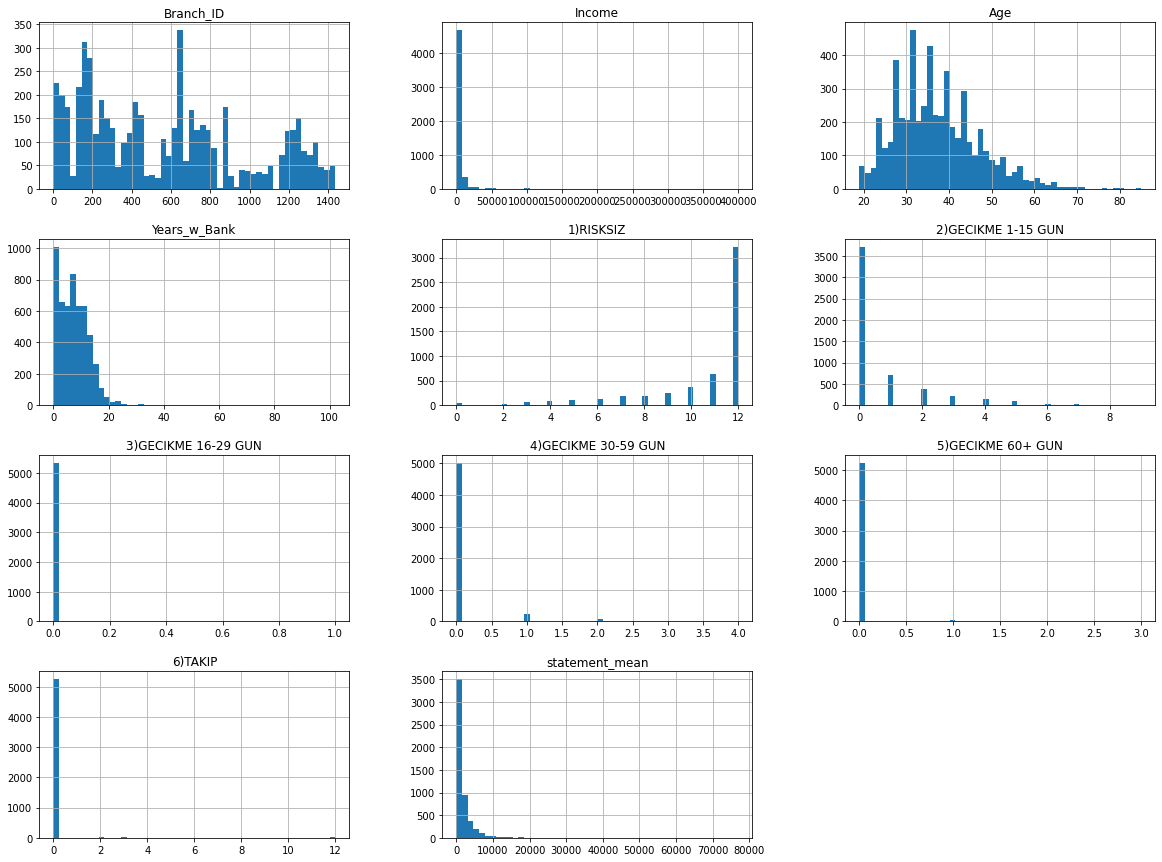

In [30]:
# Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
demo_df.iloc[:,0:19].hist(bins=50, figsize=(20,15))
plt.show()

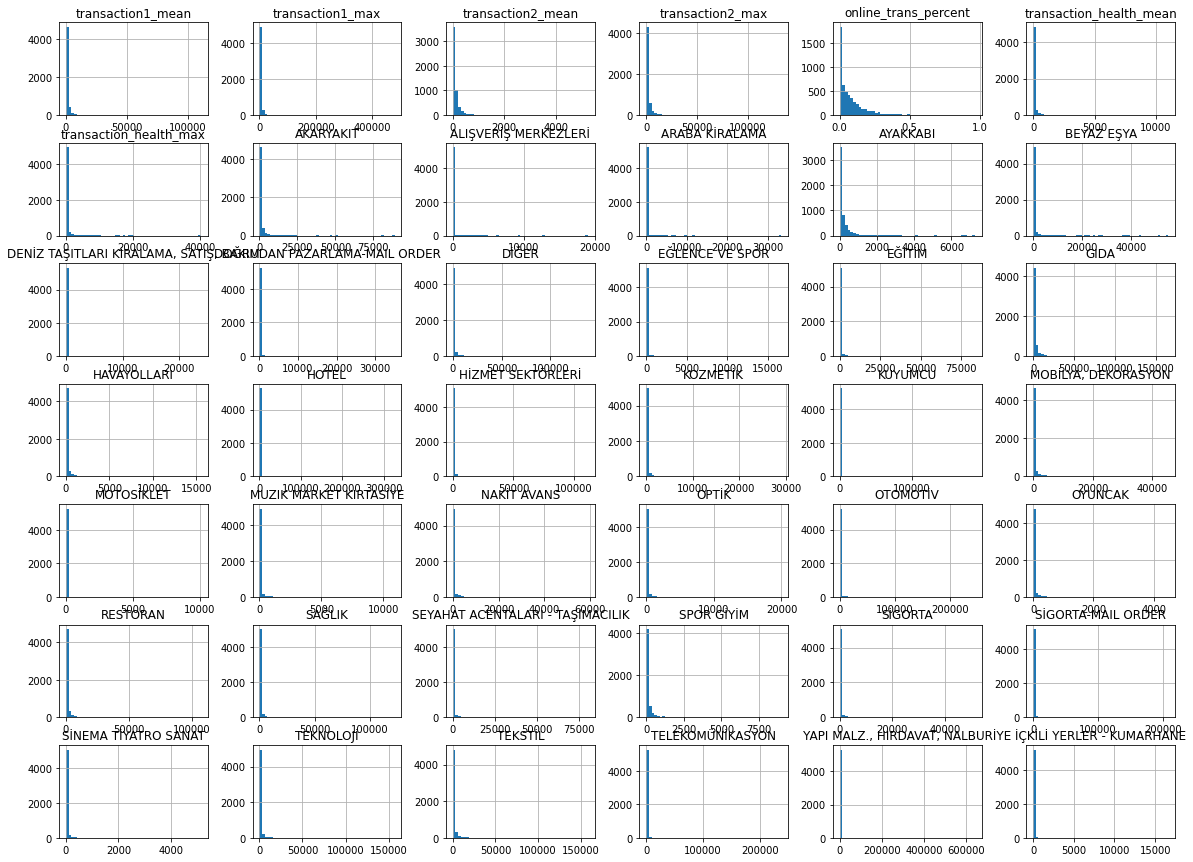

In [31]:
demo_df.iloc[:,20:].hist(bins=50, figsize=(20,15))
plt.show()

In [32]:
demo_df.columns.values

array(['Cust_Segment', 'Branch_ID', 'Gender', 'Marital_Status',
       'Education_Lv', 'Job_Status', 'Income', 'Age', 'Years_w_Bank',
       'Work_Region', 'Home_Region', 'Branch_Region', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'statement_mean', 'statement_max',
       'transaction1_mean', 'transaction1_max', 'transaction2_mean',
       'transaction2_max', 'online_trans_percent',
       'transaction_health_mean', 'transaction_health_max', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACE

## Data Processing

In [33]:
#train/test split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(demo_df, demo_df["Job_Status"]):
    train_set = demo_df.iloc[train_index]
    test_set = demo_df.iloc[test_index]

In [34]:
# separate labels from feature matrix
train_y = train_set['Job_Status']
train_X = train_set.drop('Job_Status', axis = 1)
test_y = test_set['Job_Status']
test_X = test_set.drop('Job_Status', axis = 1)

In [35]:
#pipeline

# locations, gender, marital status, education level, job status, penalties
# Additional processing with full data set: drop home region branch region nulls

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler())
])

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline  = Pipeline([
('cat_encoder', OneHotEncoder())
])

In [37]:
from sklearn.compose import ColumnTransformer
num_attribs = ['Branch_ID', 'Income', 'Age', 'Years_w_Bank', '1)RISKSIZ',
       '2)GECIKME 1-15 GUN', '3)GECIKME 16-29 GUN', '4)GECIKME 30-59 GUN',
       '5)GECIKME 60+ GUN', '6)TAKIP', 'statement_mean', 'statement_max',
       'transaction1_mean', 'transaction1_max', 'transaction2_mean',
       'transaction2_max', 'online_trans_percent',
       'transaction_health_mean', 'transaction_health_max', 'AKARYAKIT',
       'ALIŞVERİŞ MERKEZLERİ', 'ARABA KİRALAMA', 'AYAKKABI', 'BEYAZ EŞYA',
       'DENİZ TAŞITLARI KİRALAMA, SATIŞ, BAKIM',
       'DOĞRUDAN PAZARLAMA-MAIL ORDER', 'DİĞER', 'EĞLENCE VE SPOR',
       'EĞİTİM', 'GIDA', 'HAVAYOLLARI', 'HOTEL', 'HİZMET SEKTÖRLERİ',
       'KOZMETİK', 'KUYUMCU', 'MOBİLYA, DEKORASYON', 'MOTOSİKLET',
       'MUZIK MARKET KIRTASİYE', 'NAKİT AVANS', 'OPTİK', 'OTOMOTİV',
       'OYUNCAK', 'RESTORAN', 'SAĞLIK',
       'SEYAHAT ACENTALARI - TAŞIMACILIK', 'SPOR GİYİM', 'SİGORTA',
       'SİGORTA-MAIL ORDER', 'SİNEMA TİYATRO SANAT', 'TEKNOLOJİ',
       'TEKSTİL', 'TELEKOMÜNİKASYON', 'YAPI MALZ., HIRDAVAT, NALBURİYE',
       'İÇKİLİ YERLER - KUMARHANE']
cat_attribs = ['Cust_Segment', 'Gender', 'Marital_Status', 'Education_Lv', 'Work_Region', 'Home_Region', 'Branch_Region']

full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs), 
], remainder = 'passthrough')

In [38]:
train_X_prepared = full_pipeline.fit_transform(train_X)

In [39]:
# train_y = (train_y == 'EVLİ')
# test_y_md = (test_y == 'EVLİ')

## Dimensionality Reduction

In [40]:
#pca
from sklearn.decomposition import TruncatedSVD

TruncSVD = TruncatedSVD(n_components = 90)
TruncSVD.fit(train_X_prepared)
cumsum = np.cumsum(TruncSVD.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

In [41]:
d

41

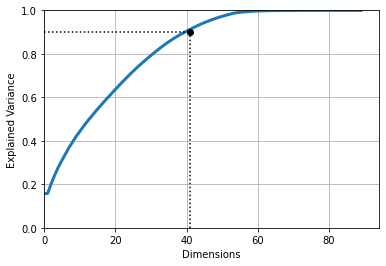

In [42]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 94, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.90], "k:")
plt.plot([0, d], [0.90, 0.90], "k:")
plt.plot(d, 0.90, "ko")

plt.grid(True)
# save_fig("explained_variance_plot")
plt.show()

# try 8 dimensions

In [43]:
TruncSVD = TruncatedSVD(n_components=41)
X_reduced = TruncSVD.fit_transform(train_X_prepared)

# Train Model

## Bagging Classifier

### Randomized Search

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

param_distribs = {
        'base_estimator__max_depth': randint(low=1, high=10),
        'base_estimator__max_features': randint(low=1, high=10),
        'n_estimators': randint(low=100, high=300)
    }

dt_classif = DecisionTreeClassifier() 

bag_classif = BaggingClassifier(base_estimator = dt_classif)
rnd_search_cv = RandomizedSearchCV(bag_classif, param_distributions=param_distribs,
                                n_iter=20, cv=3, scoring='f1_weighted', random_state=16)
rnd_search_cv.fit(X_reduced, train_y)

RandomizedSearchCV(cv=3,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=20,
                   param_distributions={'base_estimator__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe85abe0d90>,
                                        'base_estimator__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe85abe0d60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8583ff8e0>},
                   random_state=16, scoring='f1_weighted')

In [45]:
rnd_search_cv.best_params_

{'base_estimator__max_depth': 9,
 'base_estimator__max_features': 8,
 'n_estimators': 141}

### Training

#### All Dimensions

In [46]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# bag_clf = BaggingClassifier(
#     DecisionTreeClassifier(max_depth=8, max_features=6), n_estimators=115,
#     max_samples=100, bootstrap=True, n_jobs=-1,
#     oob_score=True)

# bag_clf.fit(train_X_prepared, train_y)

# bag_clf.oob_score_

In [47]:
# from sklearn.model_selection import cross_val_predict

# y_train_pred = cross_val_predict(bag_clf, X_reduced, train_y, cv = 3)

In [48]:
# from sklearn.metrics import accuracy_score

# accuracy_score(train_y, y_train_pred)

In [49]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(train_y, y_train_pred)

In [50]:
# How to treat branch_id - should be discrete

# download docker container image with components needed
# set up conda environment, install rapids
# rapids.ai

#### Reduced Dimensions

In [51]:
# bag_clf = BaggingClassifier(
#     DecisionTreeClassifier(max_depth=8, max_features=6), n_estimators=115,
#     max_samples=100, bootstrap=True, n_jobs=-1,
#     oob_score=True)

# bag_clf.fit(X_reduced, train_y)

# bag_clf.oob_score_

In [52]:
# y_train_pred = cross_val_predict(bag_clf, X_reduced, train_y, cv = 3)

# accuracy_score(train_y, y_train_pred)

In [53]:
# confusion_matrix(train_y, y_train_pred)

## AdaBoost

### Random Search

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import AdaBoostClassifier

param_distribs = {
        'base_estimator__max_depth': randint(low=1, high=10),
        'base_estimator__max_features': randint(low=1, high=10),
        'n_estimators': randint(low=100, high=500),
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
    }

dt_classif = DecisionTreeClassifier() 

ada_classif = AdaBoostClassifier(base_estimator = dt_classif, algorithm="SAMME.R")
rnd_search = RandomizedSearchCV(ada_classif, param_distributions=param_distribs,
                                n_iter=20, cv=3, scoring='f1_weighted', random_state=16)
rnd_search.fit(X_reduced, train_y)

RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_iter=20,
                   param_distributions={'base_estimator__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe850f620a0>,
                                        'base_estimator__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe850f73280>,
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe850f62730>},
                   random_state=16, scoring='f1_weighted')

In [55]:
rnd_search.best_params_

{'base_estimator__max_depth': 1,
 'base_estimator__max_features': 6,
 'learning_rate': 0.5,
 'n_estimators': 384}

### Training

In [56]:
# ada_clf = AdaBoostClassifier(
# DecisionTreeClassifier(max_depth=4, max_features=4), n_estimators=462,
# algorithm="SAMME.R", learning_rate=0.4)

# ada_clf.fit(X_reduced, train_y)

In [57]:
# from sklearn.model_selection import cross_val_predict

# y_train_pred = cross_val_predict(ada_clf, X_reduced, train_y, cv = 3)

In [58]:
# confusion_matrix(train_y, y_train_pred)

In [59]:
# accuracy_score(train_y, y_train_pred)

## Gradient Boost

### Random Search

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=1, high=10),
        'max_features': randint(low=1, high=10),
        'n_estimators': randint(low=100, high=500),
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
    }


gb_classif = GradientBoostingClassifier()
rd_search = RandomizedSearchCV(gb_classif, param_distributions=param_distribs,
                                n_iter=10, cv=3, scoring='f1_weighted', random_state=16)
rd_search.fit(train_X_prepared, train_y)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe850f471f0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe850f474c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe8722605e0>},
                   random_state=16, scoring='f1_weighted')

In [61]:
rd_search.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'max_features': 5, 'n_estimators': 306}

### Training

In [62]:
# gbrt = GradientBoostingClassifier(max_depth=6, max_features=3, n_estimators=336, learning_rate=0.1)
# gbrt.fit(train_X_prepared, train_y)

In [63]:
# from sklearn.model_selection import cross_val_predict

# y_train_pred = cross_val_predict(gbrt, train_X_prepared, train_y, cv = 3)

In [64]:
# from sklearn.metrics import accuracy_score

# accuracy_score(train_y, y_train_pred)

In [65]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(train_y, y_train_pred)

In [66]:
# confusion_matrix(train_y, y_train_pred)

## Neural Network

In [67]:
# import tensorflow as tf
# from tensorflow import keras

In [68]:
# input_ = keras.layers.Input(shape=train_X_prepared.shape[1:])
# hidden1 = keras.layers.Dense(25, activation="relu")(input_)
# hidden2 = keras.layers.Dense(25, activation="relu")(hidden1)
# hidden3 = keras.layers.Dense(25, activation="relu")(hidden2)
# output = keras.layers.Dense(1)(hidden3)
# model = keras.models.Model(inputs=[input_], outputs=[output])
# model.summary()

In [69]:
# model.compile(loss="binary_crossentropy",
# metrics=["accuracy"])

In [70]:
# history = model.fit(X_train, y_train, epochs=30,
# validation_data=(X_val, y_val))